In [2]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline

from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar

In [3]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

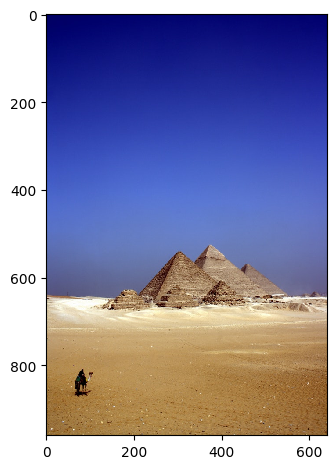

In [4]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()

# NOTE: testing show_images
# show_images([pyramids],['Pyramids'])


In [36]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

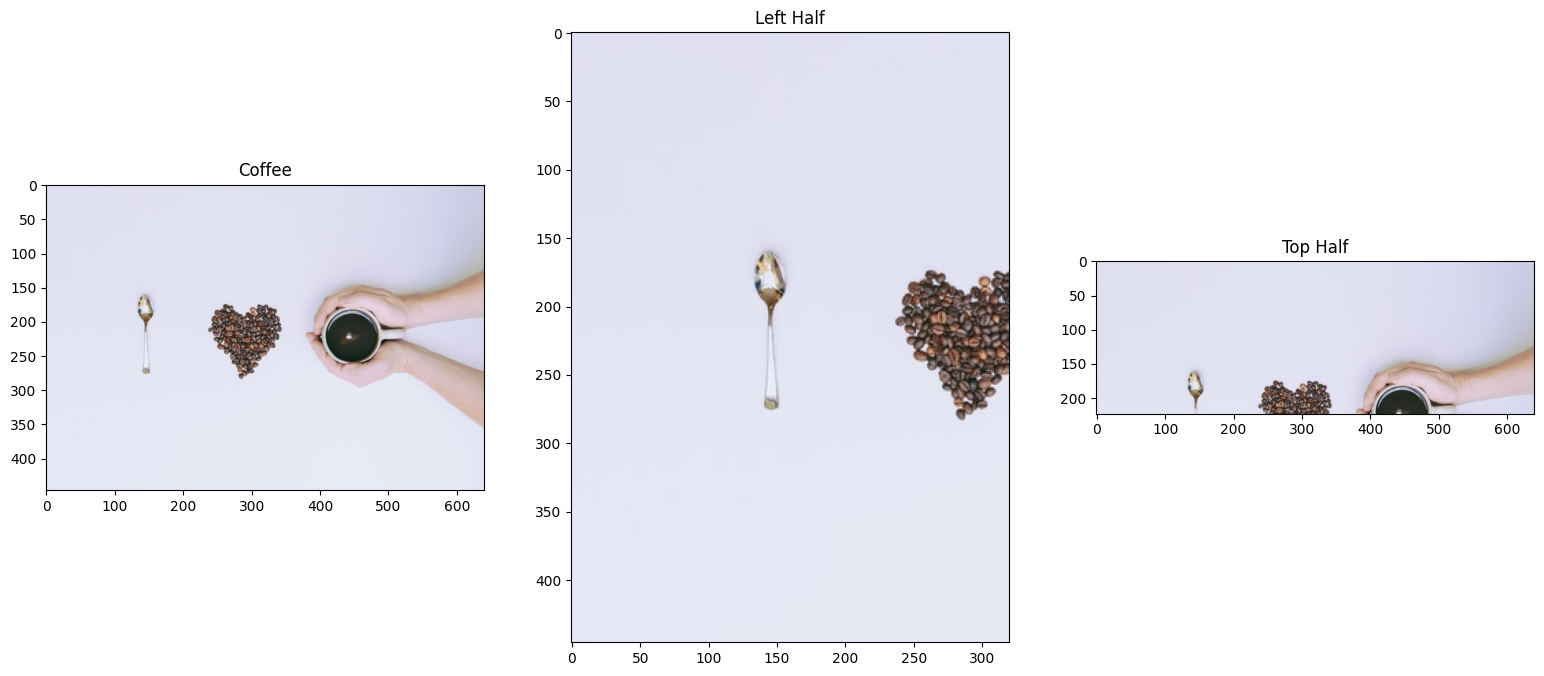

In [6]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''

coffee = io.imread('coffee.jpeg')
coffee_left_half = coffee[:,:coffee.shape[1]//2]
coffee_top_half = coffee[:coffee.shape[0]//2,:]

show_images([coffee,coffee_left_half,coffee_top_half],['Coffee','Left Half','Top Half'])

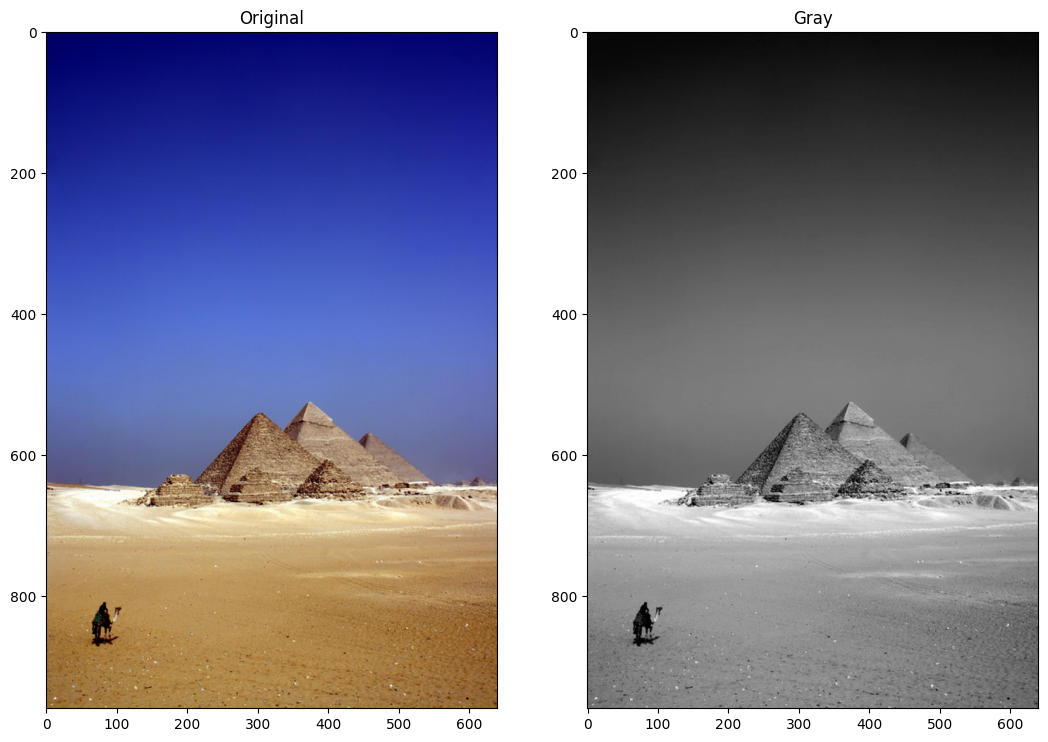

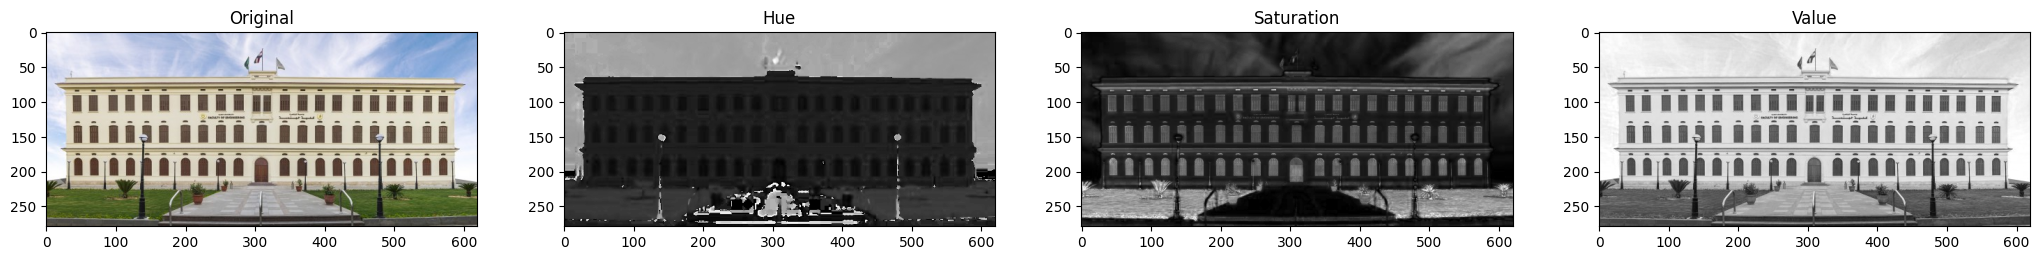

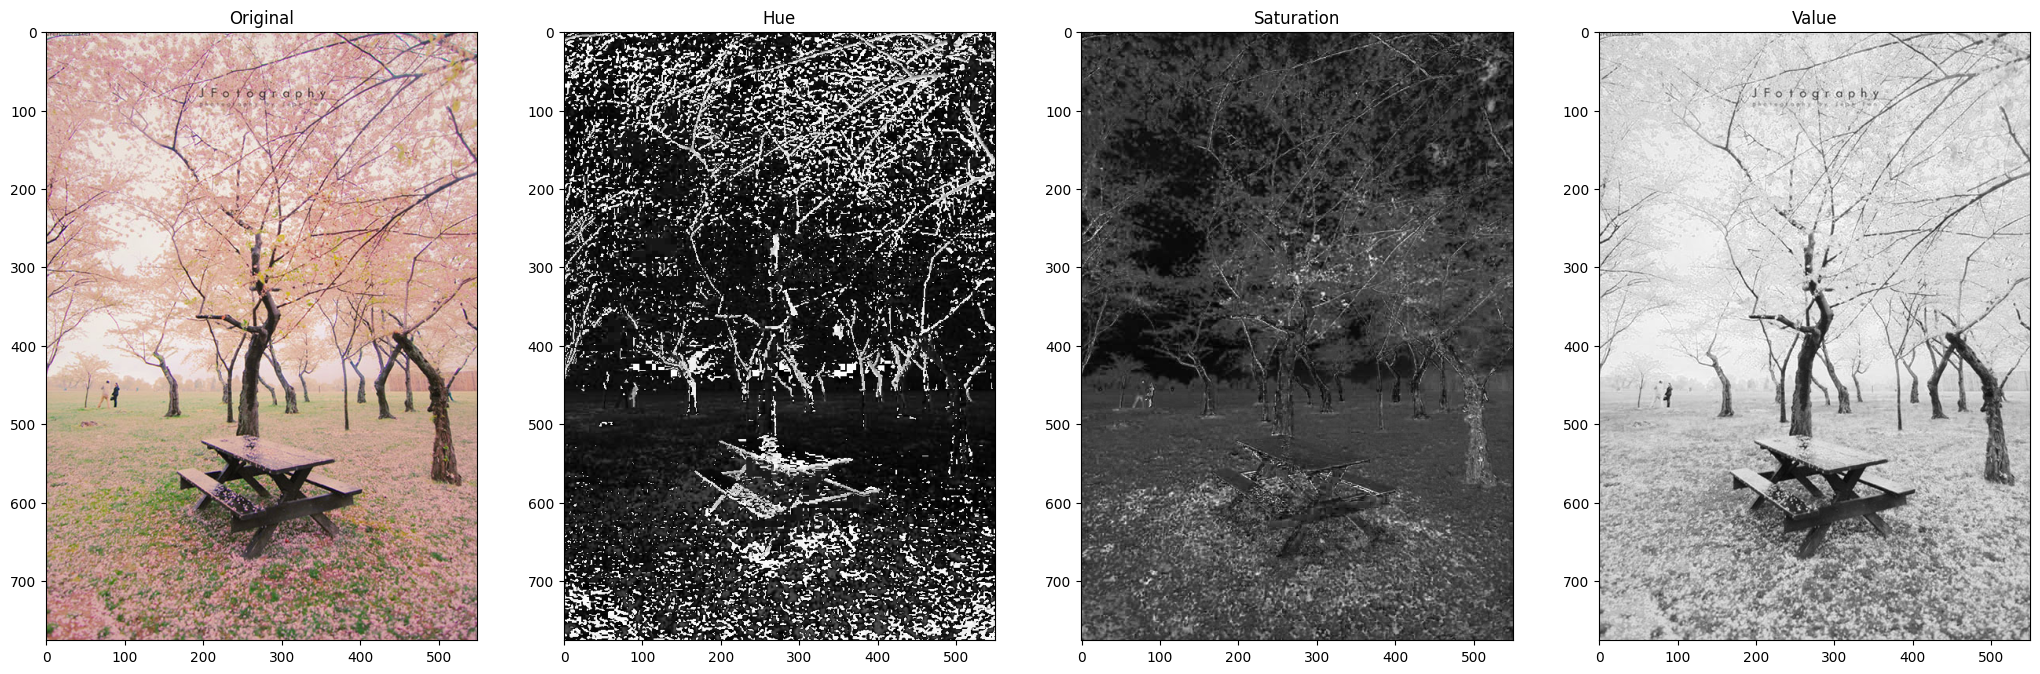

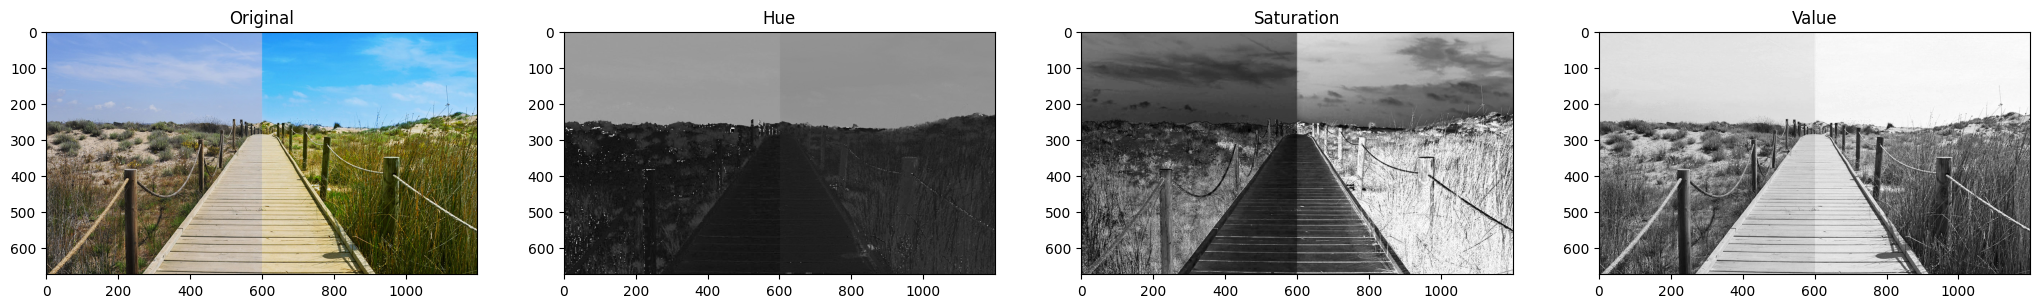

In [7]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''

def gray_image(image):
    gray = rgb2gray(image)
    show_images([image,gray],['Original','Gray'])

gray_image(pyramids)

def HSV_image(image):
    hsv = rgb2hsv(image)
    show_images([image,hsv[:,:,0],hsv[:,:,1],hsv[:,:,2]],['Original','Hue','Saturation','Value'])

HSV_image(io.imread('hsv/ex1.png'))
HSV_image(io.imread('hsv/ex2.jpg'))
HSV_image(io.imread('hsv/ex3.jpg'))
    

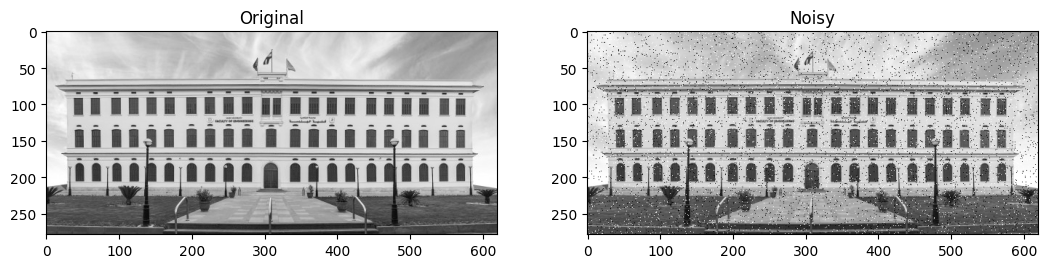

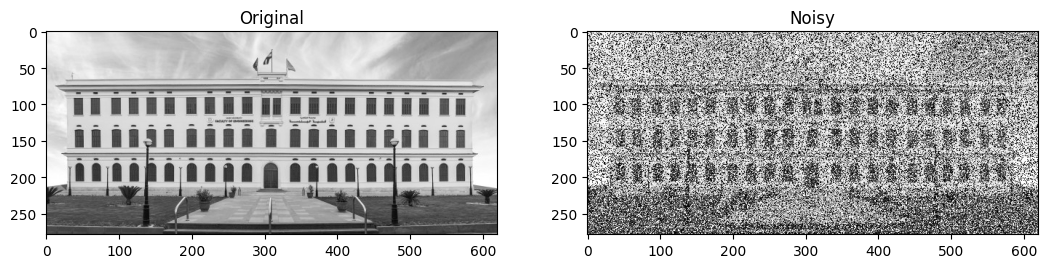

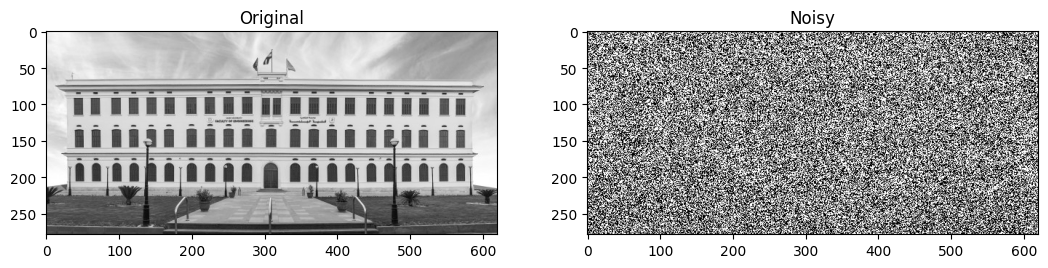

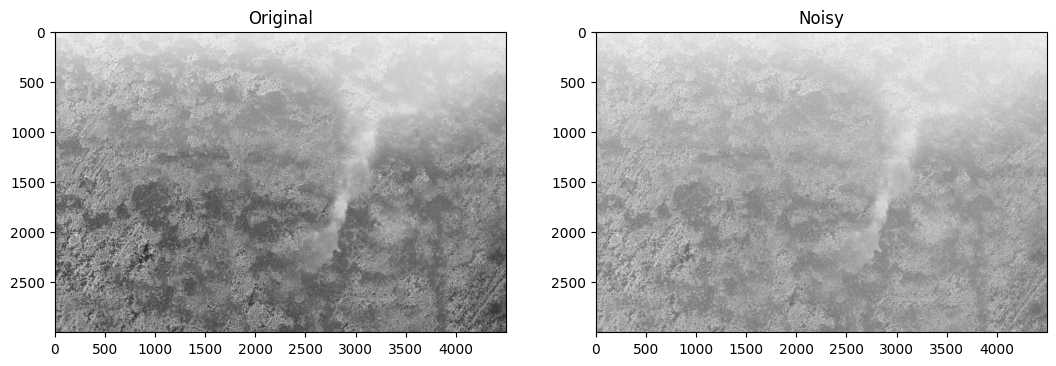

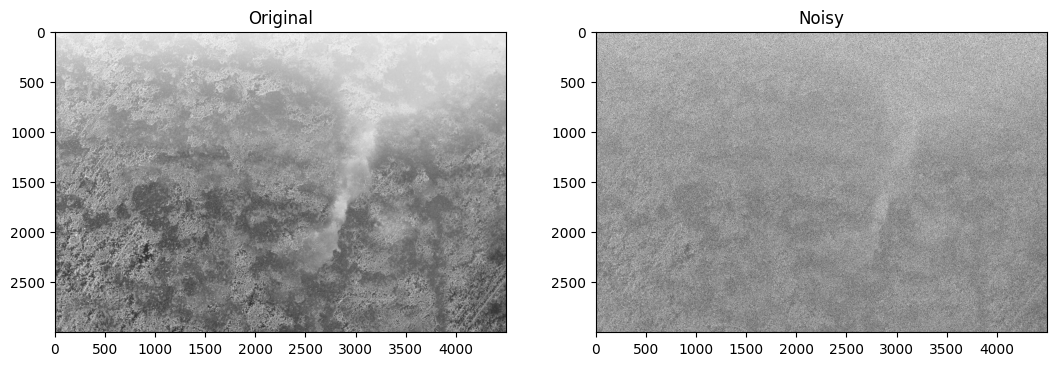

In [8]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''

def apply_noise(image,amount):
    gray = rgb2gray(image)
    # NOTE: s&p noise is salt and pepper noise
    # salt and pepper refers to the white and black dots that appear in the image
    noisy = random_noise(gray,mode='s&p',amount=amount)
    show_images([gray, noisy],['Original','Noisy'])

apply_noise(io.imread('hsv/ex1.png'),0.05)
apply_noise(io.imread('hsv/ex1.png'),0.5)
apply_noise(io.imread('hsv/ex1.png'),0.9)

# NOTE: in general, images with less detail are less affected by noise
# also images that looks like noise in the first place will have similar effect
# from images in the lab, the image 'ex1.jpg' is a good candidate as it looks like a noise texture
apply_noise(io.imread('histogram/ex1.jpg'),0.05)
apply_noise(io.imread('histogram/ex1.jpg'),0.5)



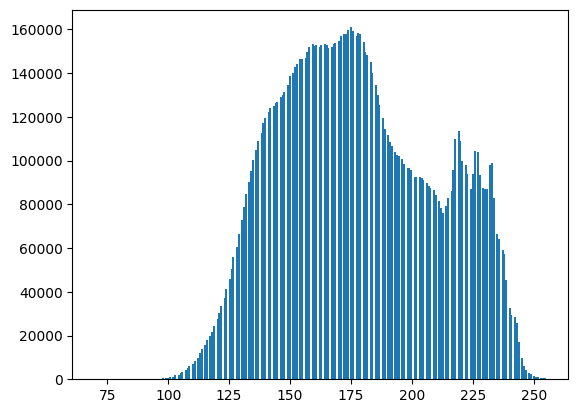

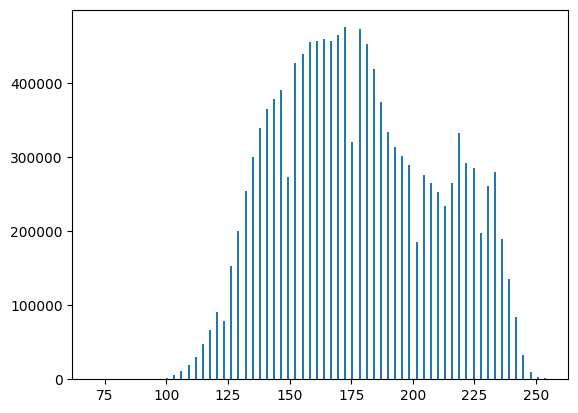

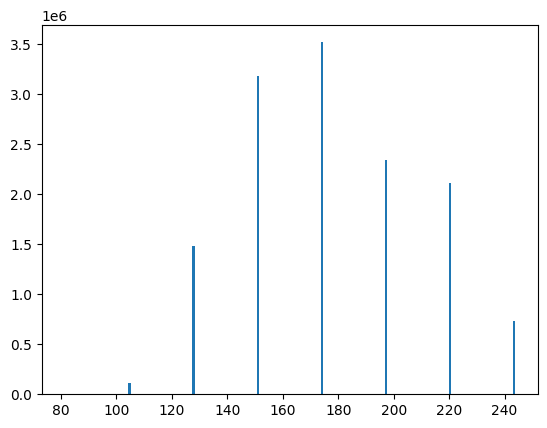

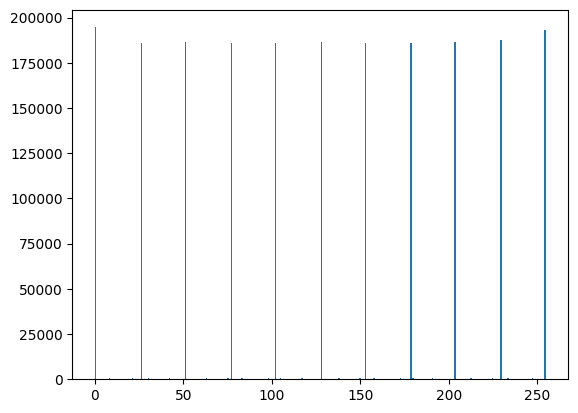

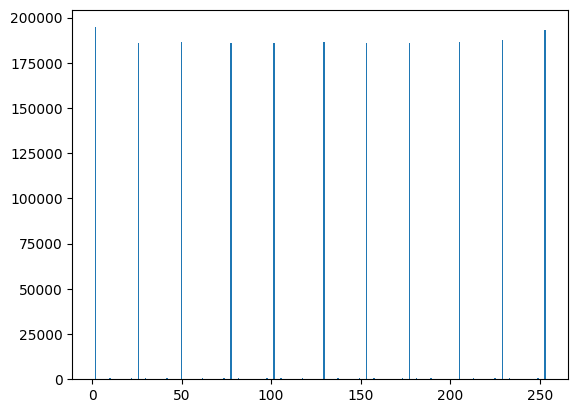

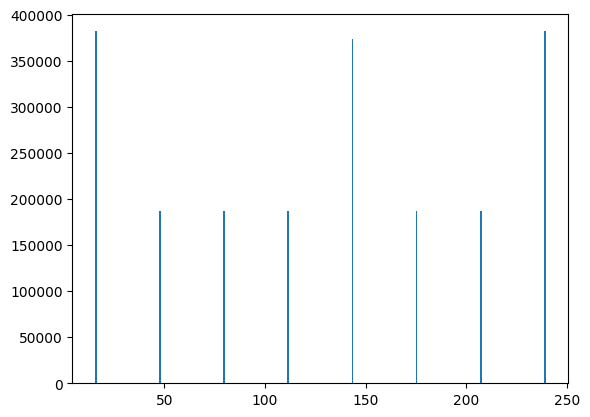

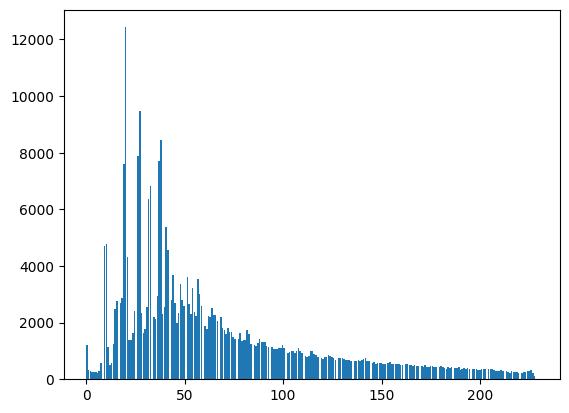

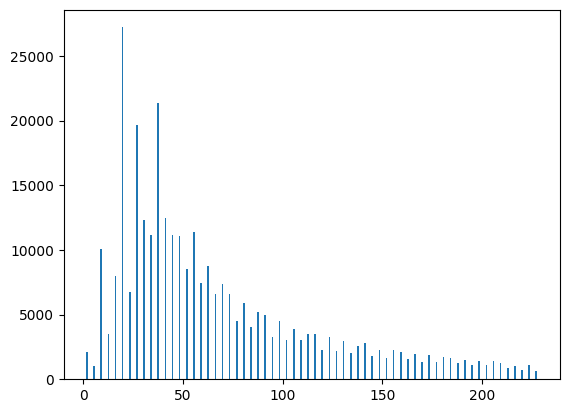

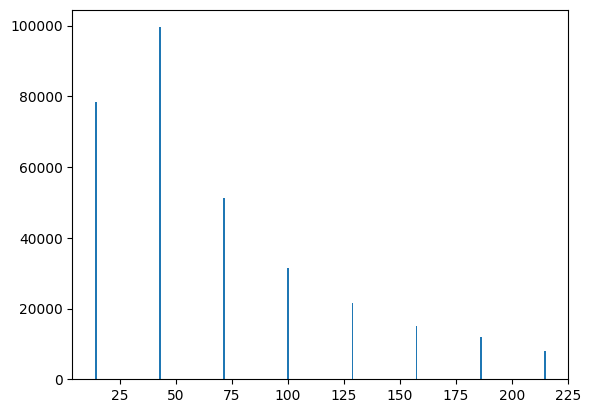

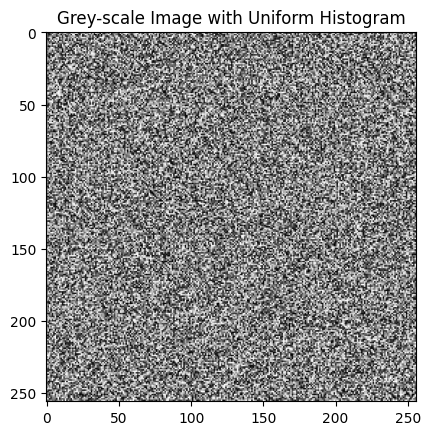

In [38]:
'''
Requirement 3 (Histogram):

1- For the given images ( in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''
import os

def show_histograms():
    folder_path = 'histogram/'
    # nbins is the num of bins to calc the histogram. The default value is 256, 
    # which is typical for 8-bit images where pixel intensities range from 0 to 255.
    nbins_list = [256, 64, 8] 
    # Changing the values of nbins results in:
    # Lower nbins: With fewer bins, the histogram will be less detailed. This can lead to a loss of information about the distribution of pixel values.
    # Higher nbins: Increasing the number of bins allows for a more detailed representation of the pixel intensity distribution. 

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        test_img = io.imread(file_path)
        # for some reason the images in histogram dir are RGBA
        if test_img.shape[2] == 4:  
            test_img = test_img[:, :, :3]  # so here we just drop the alpha channel so we could convert to gray_scale
        test_img = rgb2gray(test_img)
        
        for i in range(3):
            histogram1, bins = histogram(test_img, nbins=nbins_list[i]) 
            showHist(test_img, (histogram1[:], bins[:]))


def create_gray_scale_img(image_size: int):
    intensity_levels = np.tile(np.arange(256), 256)  # Repeat each level 256 times, so we will have 1D array of  256 * 256 = 65536 total pixels
    np.random.shuffle(intensity_levels)  
    image = intensity_levels.reshape((image_size, image_size)) # rehsape the 1D array to create a 2D array (image)
    show_images([image],['Grey-scale Image with Uniform Histogram'])
    
    
show_histograms()
create_gray_scale_img(image_size=256)

